In [40]:
import numpy as np
from keras.preprocessing.text import Tokenizer 
from keras.datasets import imdb
from keras import preprocessing
from keras.layers import Embedding
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense 
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras.layers import Embedding, SimpleRNN
import pandas as pd

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df=pd.read_csv('/content/drive/My Drive/sentiments mam/Sentiment.csv')

In [43]:
#df=pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Sentiment.csv')

In [44]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,07-08-15 9:54,6.296970e+17,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,07-08-15 9:54,6.296970e+17,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,07-08-15 9:54,6.296970e+17,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,07-08-15 9:54,6.296970e+17,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,07-08-15 9:54,6.296970e+17,NaN,Arizona


In [45]:
df.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [46]:
df=df[['sentiment','text']]

In [47]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [48]:
df.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [49]:
#df=df[(df.sentiment=='Positive')|(df.sentiment=='Negative')]

In [50]:
df.sentiment.replace({'Positive':1,'Neutral':0, 'Negative':2},inplace=True)

In [51]:
df=df[['text','sentiment']]

In [52]:
df.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,0
3,RT @RobGeorge: That Carly Fiorina is trending ...,1
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1


In [53]:
df.iloc[2,0]

'RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.'

In [54]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs and user mentions
    text = re.sub(r"http\S+|@\S+", "", text)
    
    # Remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [w for w in words if w not in stop_words]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a single string
    text = " ".join(words)
    
    return text


In [55]:
df.text

0        RT @NancyLeeGrahn: How did everyone feel about...
1        RT @ScottWalker: Didn't catch the full #GOPdeb...
2        RT @TJMShow: No mention of Tamir Rice and the ...
3        RT @RobGeorge: That Carly Fiorina is trending ...
4        RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                               ...                        
13866    RT @cappy_yarbrough: Love to see men who will ...
13867    RT @georgehenryw: Who thought Huckabee exceede...
13868    RT @Lrihendry: #TedCruz As President, I will a...
13869    RT @JRehling: #GOPDebate Donald Trump says tha...
13870    RT @Lrihendry: #TedCruz headed into the Presid...
Name: text, Length: 13871, dtype: object

In [56]:
import nltk

In [57]:
#nltk.download()

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
df["preprocessed_text"] = df["text"].apply(preprocess_text)

In [61]:
df.drop(['text'],axis=1,inplace=True)

In [62]:
x=df.iloc[:,df.columns!='sentiment']
x=x.iloc[:,0]

In [63]:
y=df.iloc[:,df.columns=='sentiment']
y=y.iloc[:,0]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
input_train, input_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [66]:
y_train.value_counts()

2    5684
0    2112
1    1497
Name: sentiment, dtype: int64

In [67]:
len(input_train)

9293

In [68]:
df.iloc[1,0]

1

In [69]:
input_train

2514     real illeg alien gopdeb farrakhan immigr amp m...
4385                                   rt rubio win gopdeb
10151                          gopdeb kasich deserv airtim
7988     rt trump said megyn ask nine candid plan suppo...
11997    rt fox news admit republican leader right mean...
                               ...                        
5191           love gopdeb take hair look great big screen
13418    rt whererwomen cairo often rail vs misogyni po...
5390     interest everi one gop candid hate govt amp ye...
860      chri christi tri wrap giuliani style gopdeb li...
7270     rt ohhhh bencarson honesti beauti soul make us...
Name: preprocessed_text, Length: 9293, dtype: object

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [71]:

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(input_train)

# Convert the preprocessed text to sequences
sequences = tokenizer.texts_to_sequences(input_train)

# Pad the sequences to a maximum length of 20
input_train = pad_sequences(sequences, maxlen=20)

# Tokenize the preprocessed text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_test)

# Convert the preprocessed text to sequences
sequences = tokenizer.texts_to_sequences(input_test)

# Pad the sequences to a maximum length of 20
input_test = pad_sequences(sequences, maxlen=20)


In [ ]:
input_train

In [73]:
input_test

array([[   0,    0,    0, ...,    8,    1,  332],
       [   0,    0,    0, ...,  627,    3, 1415],
       [   0,    0,    0, ...,   44,    1,    1],
       ...,
       [   0,    0,    0, ...,   76,  721,    1],
       [   0,    0,    0, ...,    4, 4979,    1],
       [   0,    2,  273, ...,  187, 4981, 4982]], dtype=int32)

In [ ]:
# # Training the model with Embedding and SimpleRNN Layers
# max_features = 10000
# from keras.layers import Dense
# model = Sequential()
# model.add(Embedding(max_features, 32))
# model.add(SimpleRNN(32))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history=model.fit(input_train, y_train,
# epochs=10,
# batch_size=128,
# validation_split=0.2)

In [ ]:
# import matplotlib.pyplot as plt 
# acc = history.history['acc'] 
# val_acc = history.history['val_acc'] 
# loss = history.history['loss'] 
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'g', label='Validation acc') 
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.show()

In [ ]:
# plt.plot(epochs, loss, 'bo', label='Training loss') 
# plt.plot(epochs, val_loss, 'g', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

In [74]:
from keras.layers import LSTM 
#classweights={0:0.3,1:0.8}
max_features = 10000
classweights={0:0.5,1:0.9}
model = Sequential()



In [75]:
from tensorflow.keras.utils import to_categorical

In [76]:
y_train=to_categorical(y_train)

In [77]:
model = Sequential()

In [80]:
model.add(Embedding(input_dim=10000,input_length=20,output_dim=100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

In [ ]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [81]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
 history=model.fit(input_train, y_train,
epochs=20,
batch_size=128,
validation_split=0.2)

Epoch 1/10
59/59 [==============================] - 8s 140ms/step - loss: 0.2376 - accuracy: 0.9053 - val_loss: 1.3923 - val_accuracy: 0.6283
Epoch 2/10
59/59 [==============================] - 6s 104ms/step - loss: 0.2239 - accuracy: 0.9118 - val_loss: 1.3815 - val_accuracy: 0.6251
Epoch 3/10
59/59 [==============================] - 9s 146ms/step - loss: 0.2280 - accuracy: 0.9085 - val_loss: 1.5434 - val_accuracy: 0.6245
Epoch 4/10
59/59 [==============================] - 6s 103ms/step - loss: 0.2121 - accuracy: 0.9143 - val_loss: 1.5150 - val_accuracy: 0.6218
Epoch 5/10
59/59 [==============================] - 8s 134ms/step - loss: 0.2041 - accuracy: 0.9154 - val_loss: 1.8286 - val_accuracy: 0.6159
Epoch 6/10
59/59 [==============================] - 7s 109ms/step - loss: 0.1939 - accuracy: 0.9210 - val_loss: 1.9077 - val_accuracy: 0.6192
Epoch 7/10
59/59 [==============================] - 7s 112ms/step - loss: 0.1947 - accuracy: 0.9193 - val_loss: 1.8339 - val_accuracy: 0.6261
Epoch 

In [ ]:
# from keras.layers import LSTM
# model=Sequential()
# model.add(Embedding(max_features, 32))
# model.add(LSTM(32))
# model.add(Dense (1, activation='sigmoid'))
# model.compile(optimizer='rmsprop', 
# loss='binary_crossentropy',
# metrics=['acc'])

In [89]:
import matplotlib.pyplot as plt 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
acc1 = history.history['accuracy'] 
val_acc1 = history.history['val_accuracy'] 
loss1 = history.history['loss'] 
val_loss1 = history.history['val_loss']
epochs1 = range (1, len(acc) + 1)

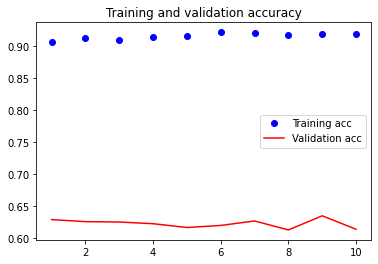

In [90]:
plt.plot(epochs1, acc1, 'bo', label='Training acc') 
plt.plot(epochs1, val_acc1, 'r', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

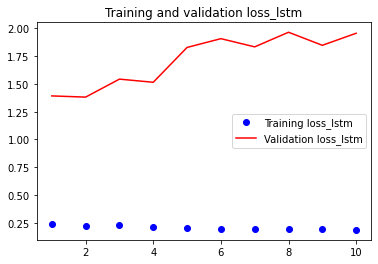

In [91]:
plt.plot(epochs1, loss1, 'bo', label='Training loss_lstm') 
plt.plot(epochs1, val_loss1, 'r', label='Validation loss_lstm') 
plt.title('Training and validation loss_lstm')
plt.legend()
plt.show()

In [92]:
y_predict=model.predict_on_batch(input_test)

In [93]:
y_predict


array([[5.3881425e-01, 2.9843104e-01, 1.6275474e-01],
       [1.5881269e-05, 3.5611845e-07, 9.9998373e-01],
       [6.1073875e-01, 2.9838135e-02, 3.5942313e-01],
       ...,
       [9.3489207e-06, 8.0702939e-08, 9.9999052e-01],
       [9.2911054e-05, 1.5627410e-06, 9.9990547e-01],
       [1.3494141e-03, 1.8968308e-07, 9.9865037e-01]], dtype=float32)

In [94]:
from sklearn.metrics import classification_report
# Make predictions on the test data
Y_pred = model.predict(input_test)

# Convert the multi-dimensional arrays to 1-dimensional arrays
y_true = y_test
y_pred = np.argmax(Y_pred, axis=1)

# Check the shapes of the arrays
print(y_true.shape)  # should be (num_samples,)
print(y_pred.shape)  # should be (num_samples,)

# Create a DataFrame with the true and predicted labels
df_test = pd.DataFrame({'true': y_true, 'pred': y_pred})

# Print the classification report
print(classification_report(df_test.true, df_test.pred))


144/144 [==============================] - 3s 15ms/step
(4578,)
(4578,)
              precision    recall  f1-score   support

           0       0.26      0.24      0.25      1030
           1       0.16      0.12      0.14       739
           2       0.62      0.68      0.65      2809

    accuracy                           0.49      4578
   macro avg       0.35      0.35      0.34      4578
weighted avg       0.46      0.49      0.48      4578



In [95]:
a=pd.DataFrame(y_pred)

In [96]:
a.value_counts()

2    3067
0     947
1     564
dtype: int64

In [97]:
#Model Prediction
text = ['He is a great leader.']
#vectorizing the tweet by the pre-fitted tokenizer instance
text = tokenizer.texts_to_sequences(text)
#padding the tweet to have exactly the same shape as `embedding_2` input
text = pad_sequences(text, maxlen=28, dtype='int32', value=0)

sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


1/1 - 0s - 458ms/epoch - 458ms/step


In [98]:
text = ['He is a terrible leader.']
#vectorizing the tweet by the pre-fitted tokenizer instance
text = tokenizer.texts_to_sequences(text)
#padding the tweet to have exactly the same shape as `embedding_2` input
text = pad_sequences(text, maxlen=28, dtype='int32', value=0)

sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

1/1 - 0s - 25ms/epoch - 25ms/step


In [99]:
#With User define function
def model_inference(text):
    text_t = [text]
    text_t = tokenizer.texts_to_sequences(text_t)
    text_t = pad_sequences(text_t, maxlen=28, dtype='int32', value=0)
    sentiment = model.predict(text_t,batch_size=1,verbose = 2)[0]
    if(np.argmax(sentiment) == 0):
        print("negative")
    elif (np.argmax(sentiment) == 1):
        print("positive")
  

In [100]:
text = 'He is a bad leader.'
model_inference(text) 

1/1 - 0s - 23ms/epoch - 23ms/step


In [101]:
text1 = 'He is a terrible leader.'
model_inference(text1)  

1/1 - 0s - 23ms/epoch - 23ms/step
